In [5]:
import pandas as pd

#### Dataset:
    
Automobile

From 1985 Ward's Automotive Yearbook

##### My goal is to perform an EDA analysis. 

In EDA there are three major steps: 

    1. Checking data structure.
    
    2. Checking data quality.
    
    3. Checking content in data.

In [6]:
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',     
'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',                  
'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']   

In [7]:
df = pd.read_csv('./data/imports-85.data', names=columns)

### 1. Data Sctructure. 

In [8]:
df.shape

(205, 26)

In [9]:
pd.value_counts(df.dtypes)

object     16
int64       5
float64     5
dtype: int64

##### 1.1 Non-numerical structure.

In [10]:
df.select_dtypes(exclude='number').head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450


There are 2 obvious problems I can see from start:

    1) Missed data marked as "?"
    
    2) Numeric data saved as object.
    
Solutions: 

    1) I'll replace '?' as NA. For now I wouldn't remove or fill them with values.
    
    2) Change types of actual numeric columns to float. 


In [11]:
df[['stroke', 'bore']] = df[['stroke', 'bore']].replace('?', None).astype(float)

In [12]:
df[['horsepower', 'price', 'peak-rpm']] = df[['horsepower', 'price', 'peak-rpm']].replace('?', None).astype(float)

In [13]:
df[['normalized-losses', 'num-of-doors']] = df[['normalized-losses', 'num-of-doors']].replace('?', None)

In [14]:
df[['normalized-losses']] = df[['normalized-losses']].replace('?', None).astype(float)

In [15]:
df.describe(exclude="number")

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [16]:
# for name in columns:
#     print(df[name].value_counts())

##### 1.2 Numerical Structure. 

<Axes: title={'center': 'Unique values per feature'}>

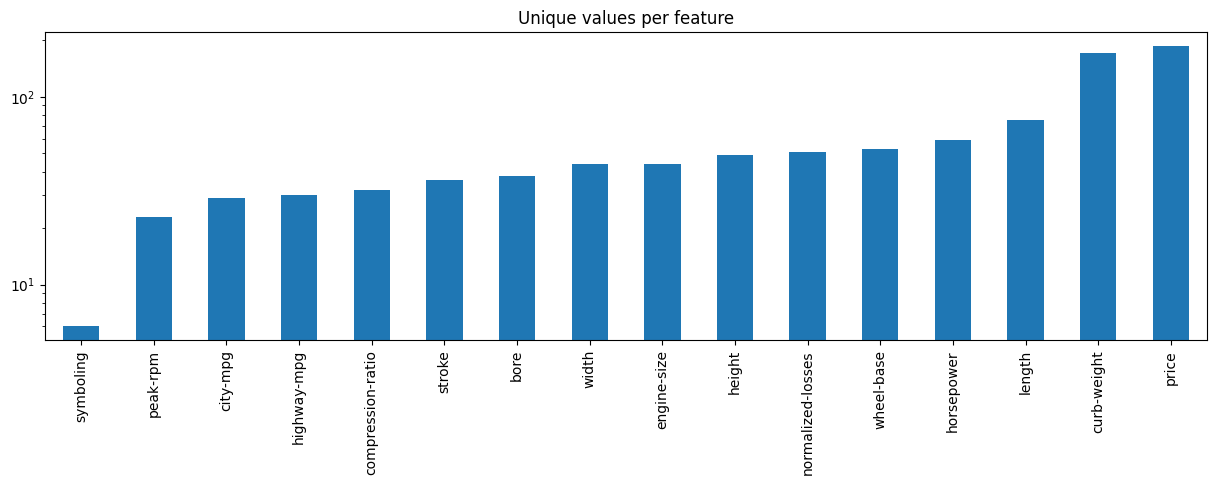

In [14]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

### 2. Data Quality 

##### 2.1 Check for duplicates. 

In [1507]:
n_duplicates = df.drop(labels=["normalized-losses"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


##### 2.2 Check for missing values

##### 2.2.1 Missing values per sample 

In [16]:
df.isna().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
engine-type           0
highway-mpg           0
city-mpg              0
compression-ratio     0
fuel-system           0
engine-size           0
num-of-cylinders      0
symboling             0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
curb-weight           0
dtype: int64

###### Visualizing missing data:

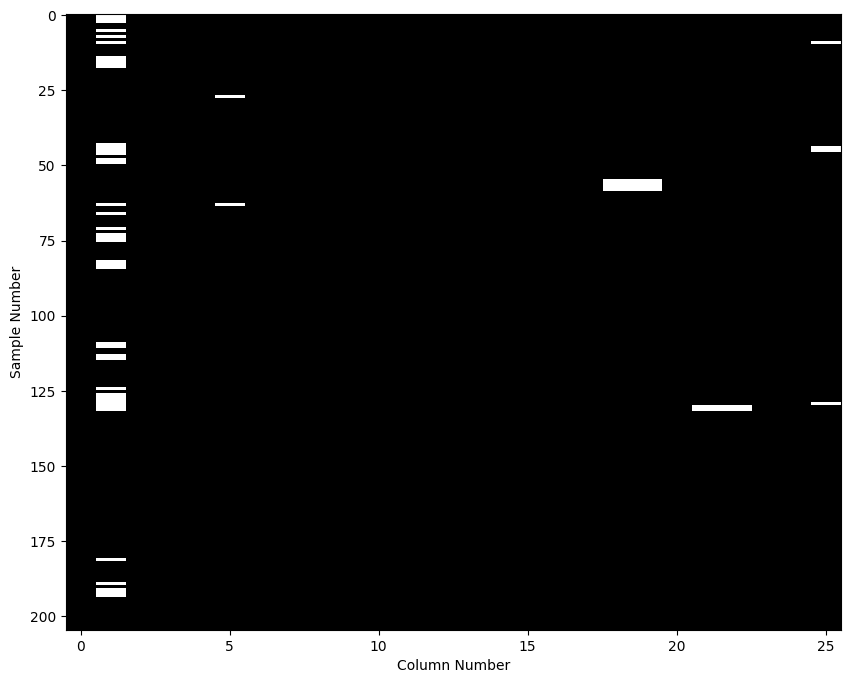

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

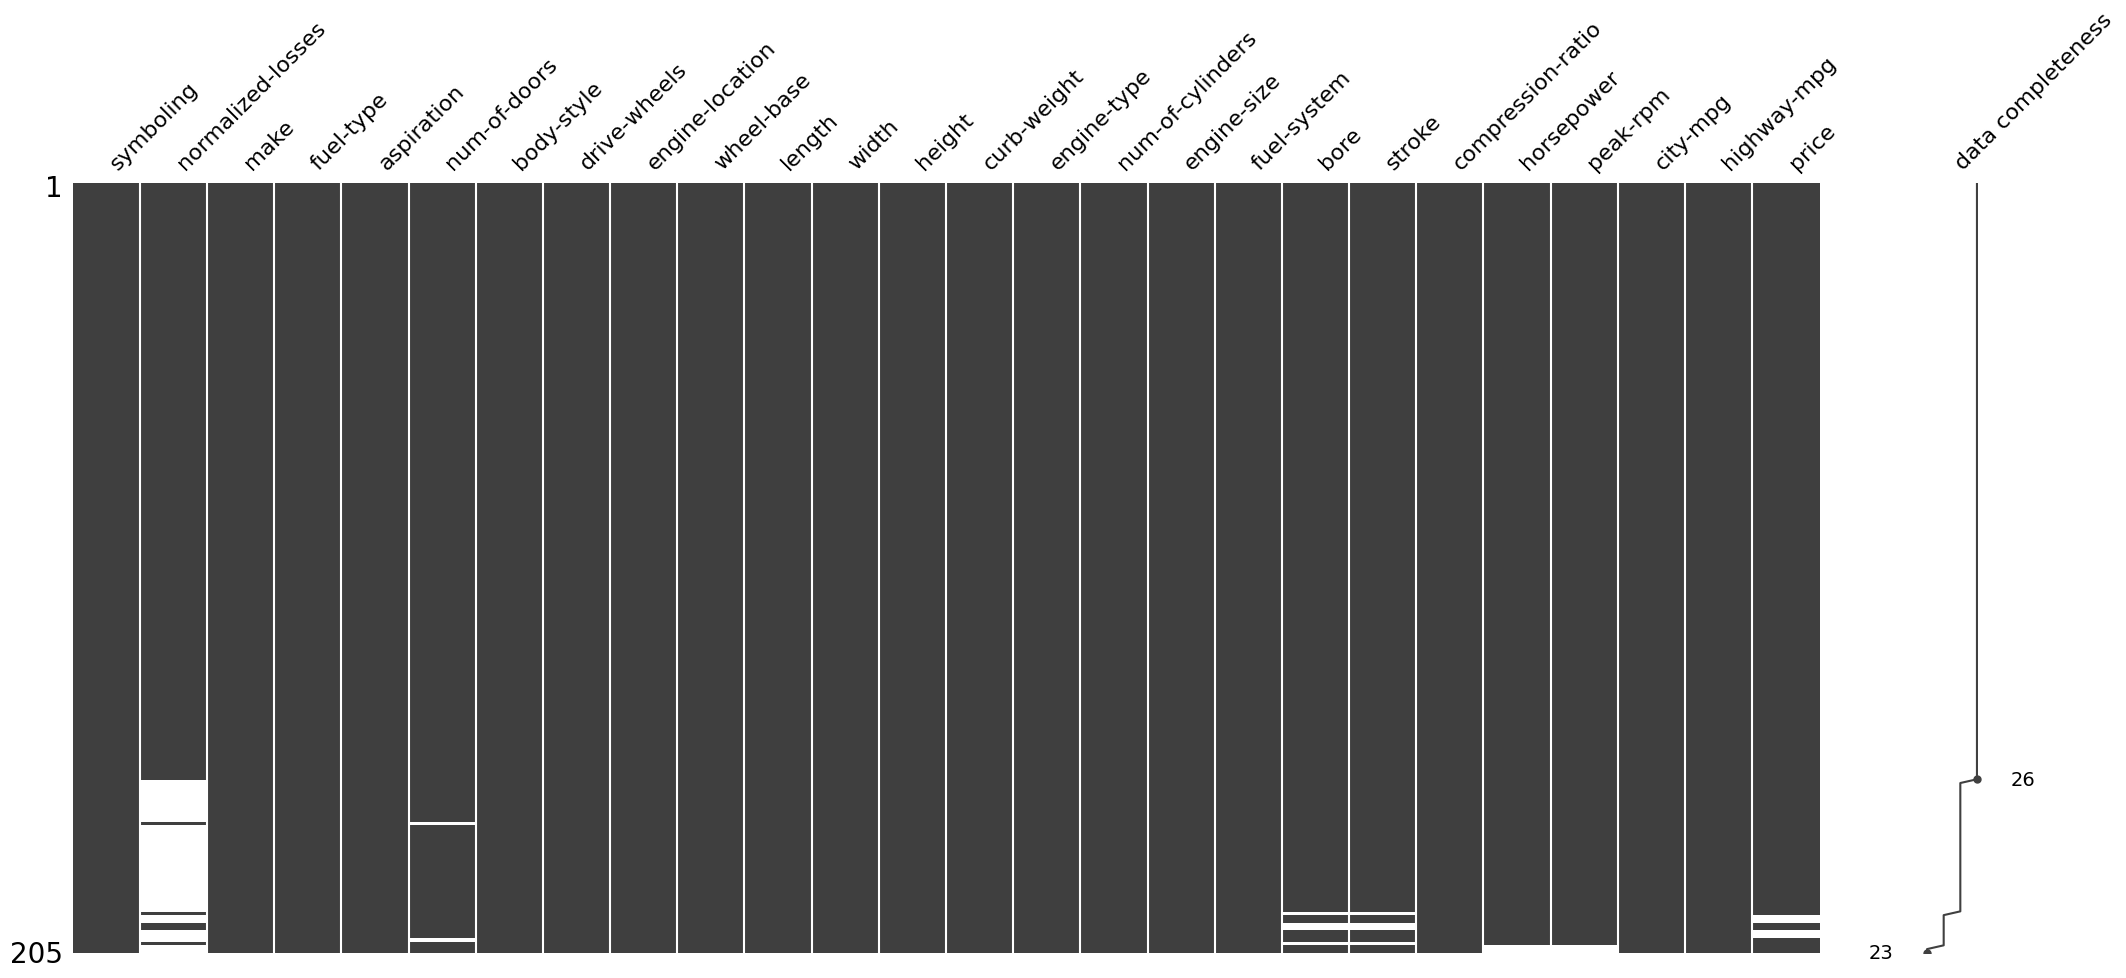

In [18]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

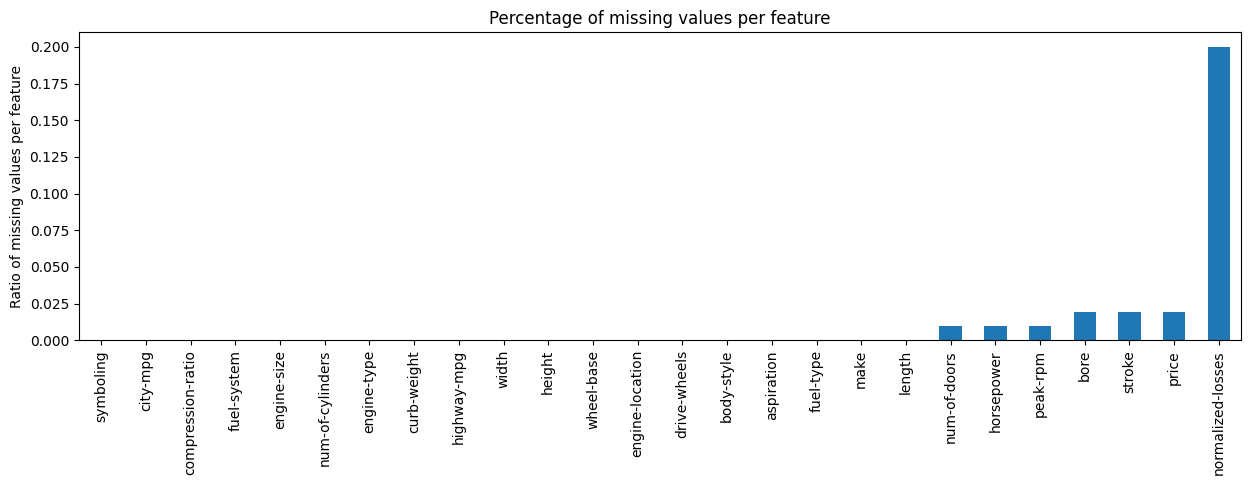

In [1508]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [1523]:
df[df['price'].isna()].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [1522]:
df[df['normalized-losses'].isna()].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


In [1521]:
# df.iloc[82:85, :].values.tolist()

In [1524]:
df[df.price.isna()].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


### 2.3 Check for errors

##### 2.3.1 Numerical features

In [20]:
df.describe(include=["number"])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


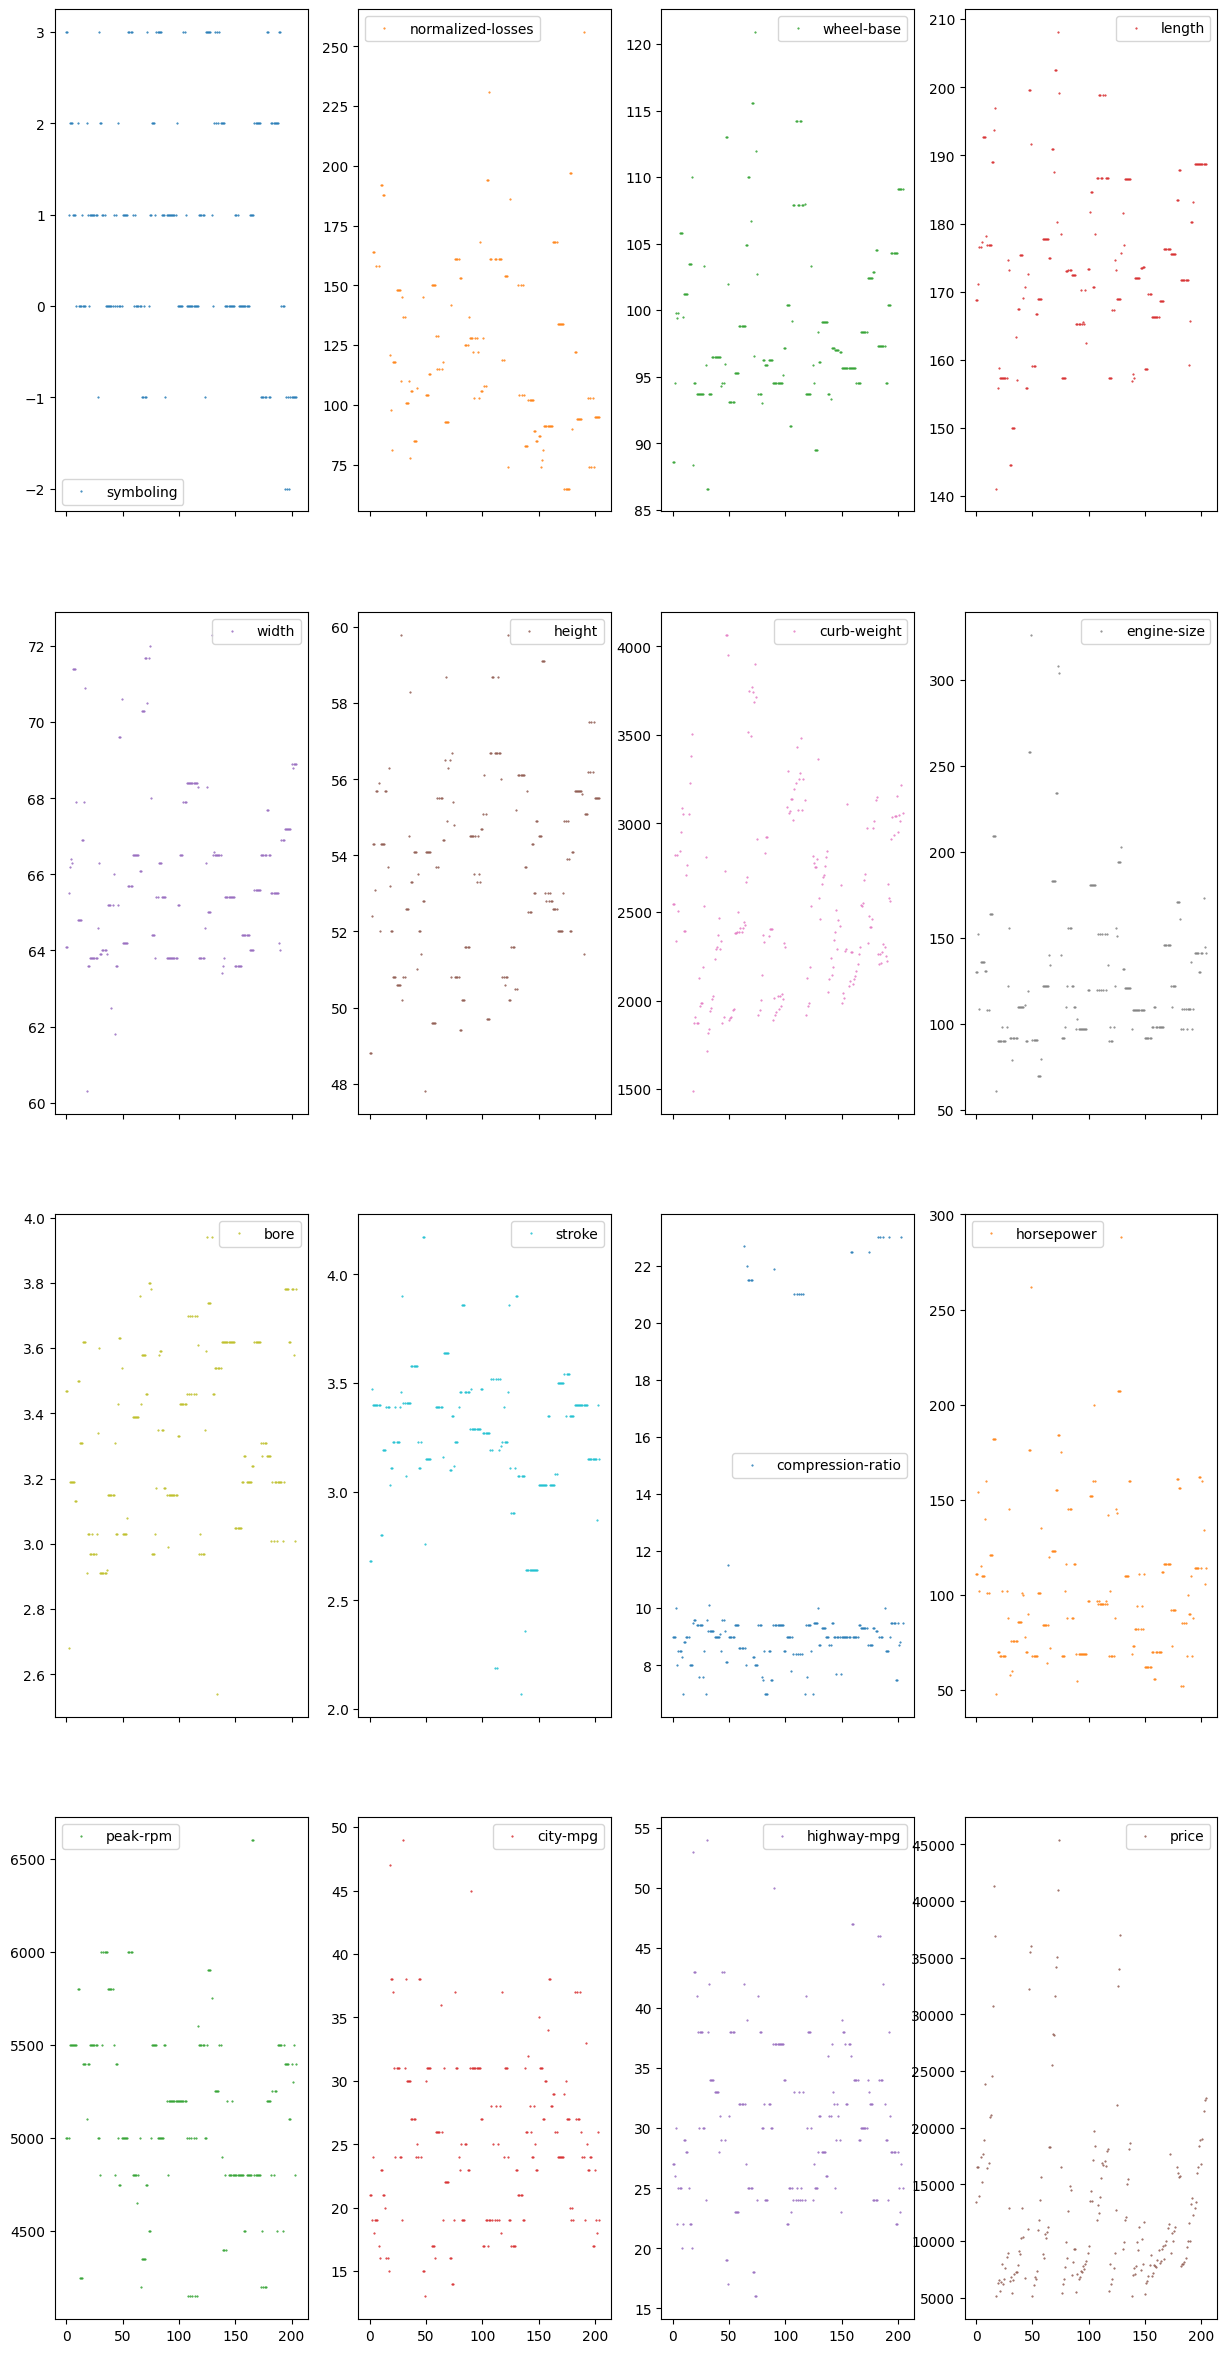

In [21]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

Visually features doesn't contain erros or outliers. 

##### 2.3.2. Non-numerical features

In [24]:
df.describe(exclude=["number"])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


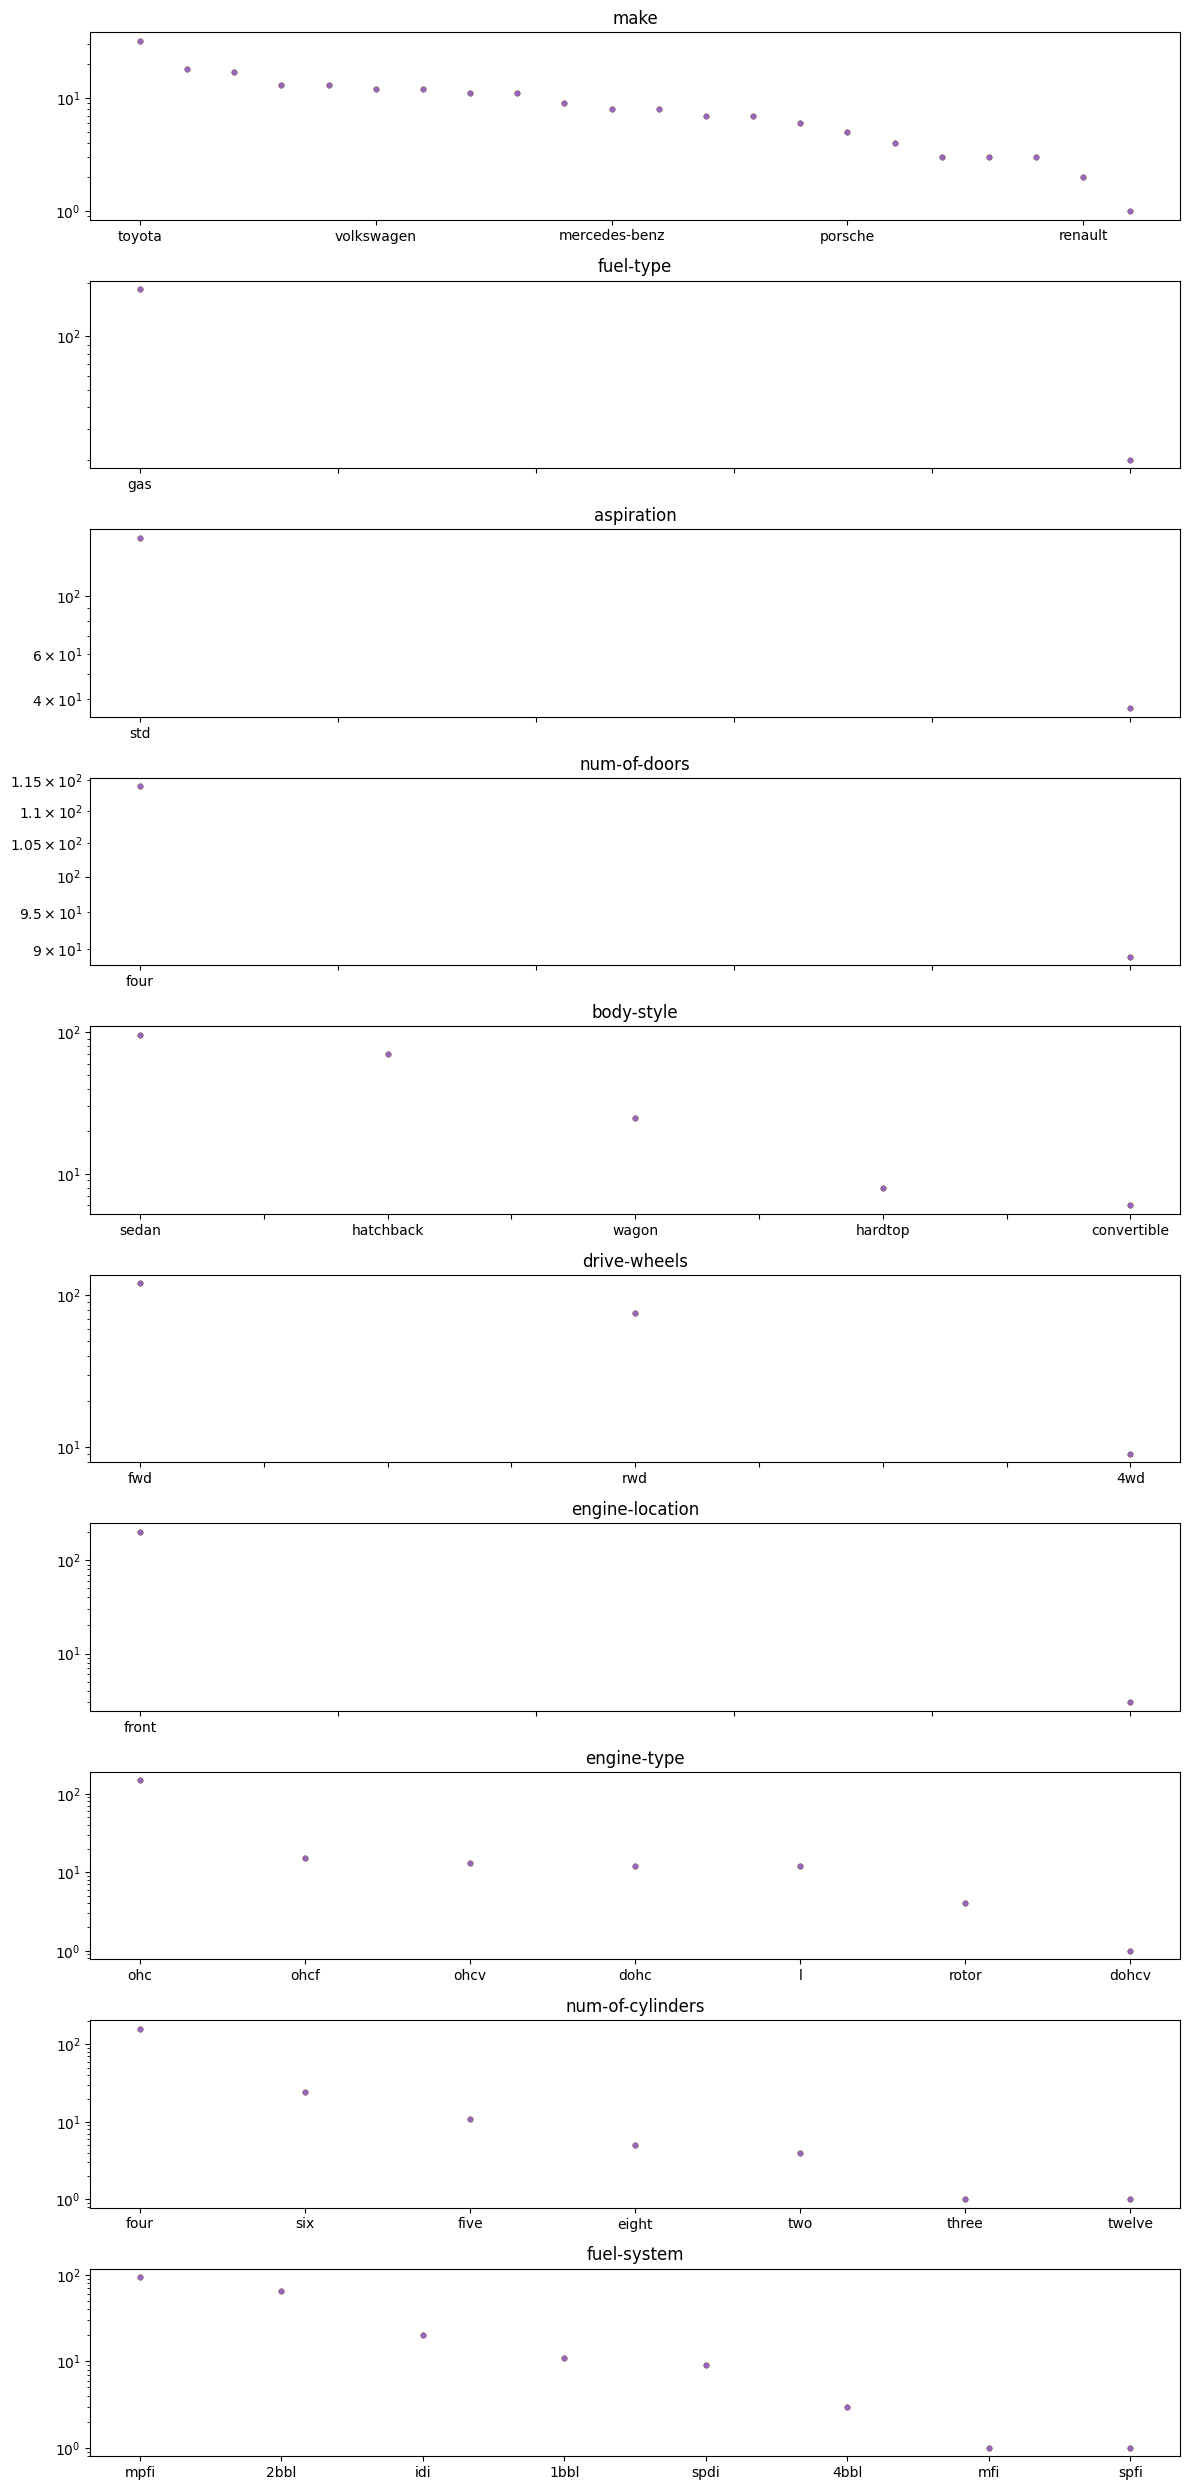

In [1526]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=10, figsize=(12, 25))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number"])

# Loop through features and put each subplot on a matplotlib axis object
intervals = [(0, 2), (2, 5), (5, 7), (7, 9), (9, 10)] 

for i in intervals:
    for col, ax in zip(df_non_numerical[i[0]: i[1]].columns, axes.ravel()):

        # Selects one single feature and counts number of occurrences per unique value
        df_non_numerical[col].value_counts().plot(

            # Plots this information in a figure with log-scaled y-axis
            logy=True, title=col, lw=0, marker=".", ax=ax)

plt.tight_layout();

# for i in list_:
#     for col, ax in zip(df_non_numerical.columns, axes.ravel()):

#         # Selects one single feature and counts number of occurrences per unique value
#         df_non_numerical[col].value_counts().plot(

#             # Plots this information in a figure with log-scaled y-axis
#             logy=True, title=col, lw=0, marker=".", ax=ax)

#     plt.tight_layout();

###### 2.4 Conclusion on quality 

Overall quality is good: features have low number of missing values. 

Except "normalized-losses" which has about 20% missed data. 

### 3. Content in Data 

##### 3.1. Feature distribution 

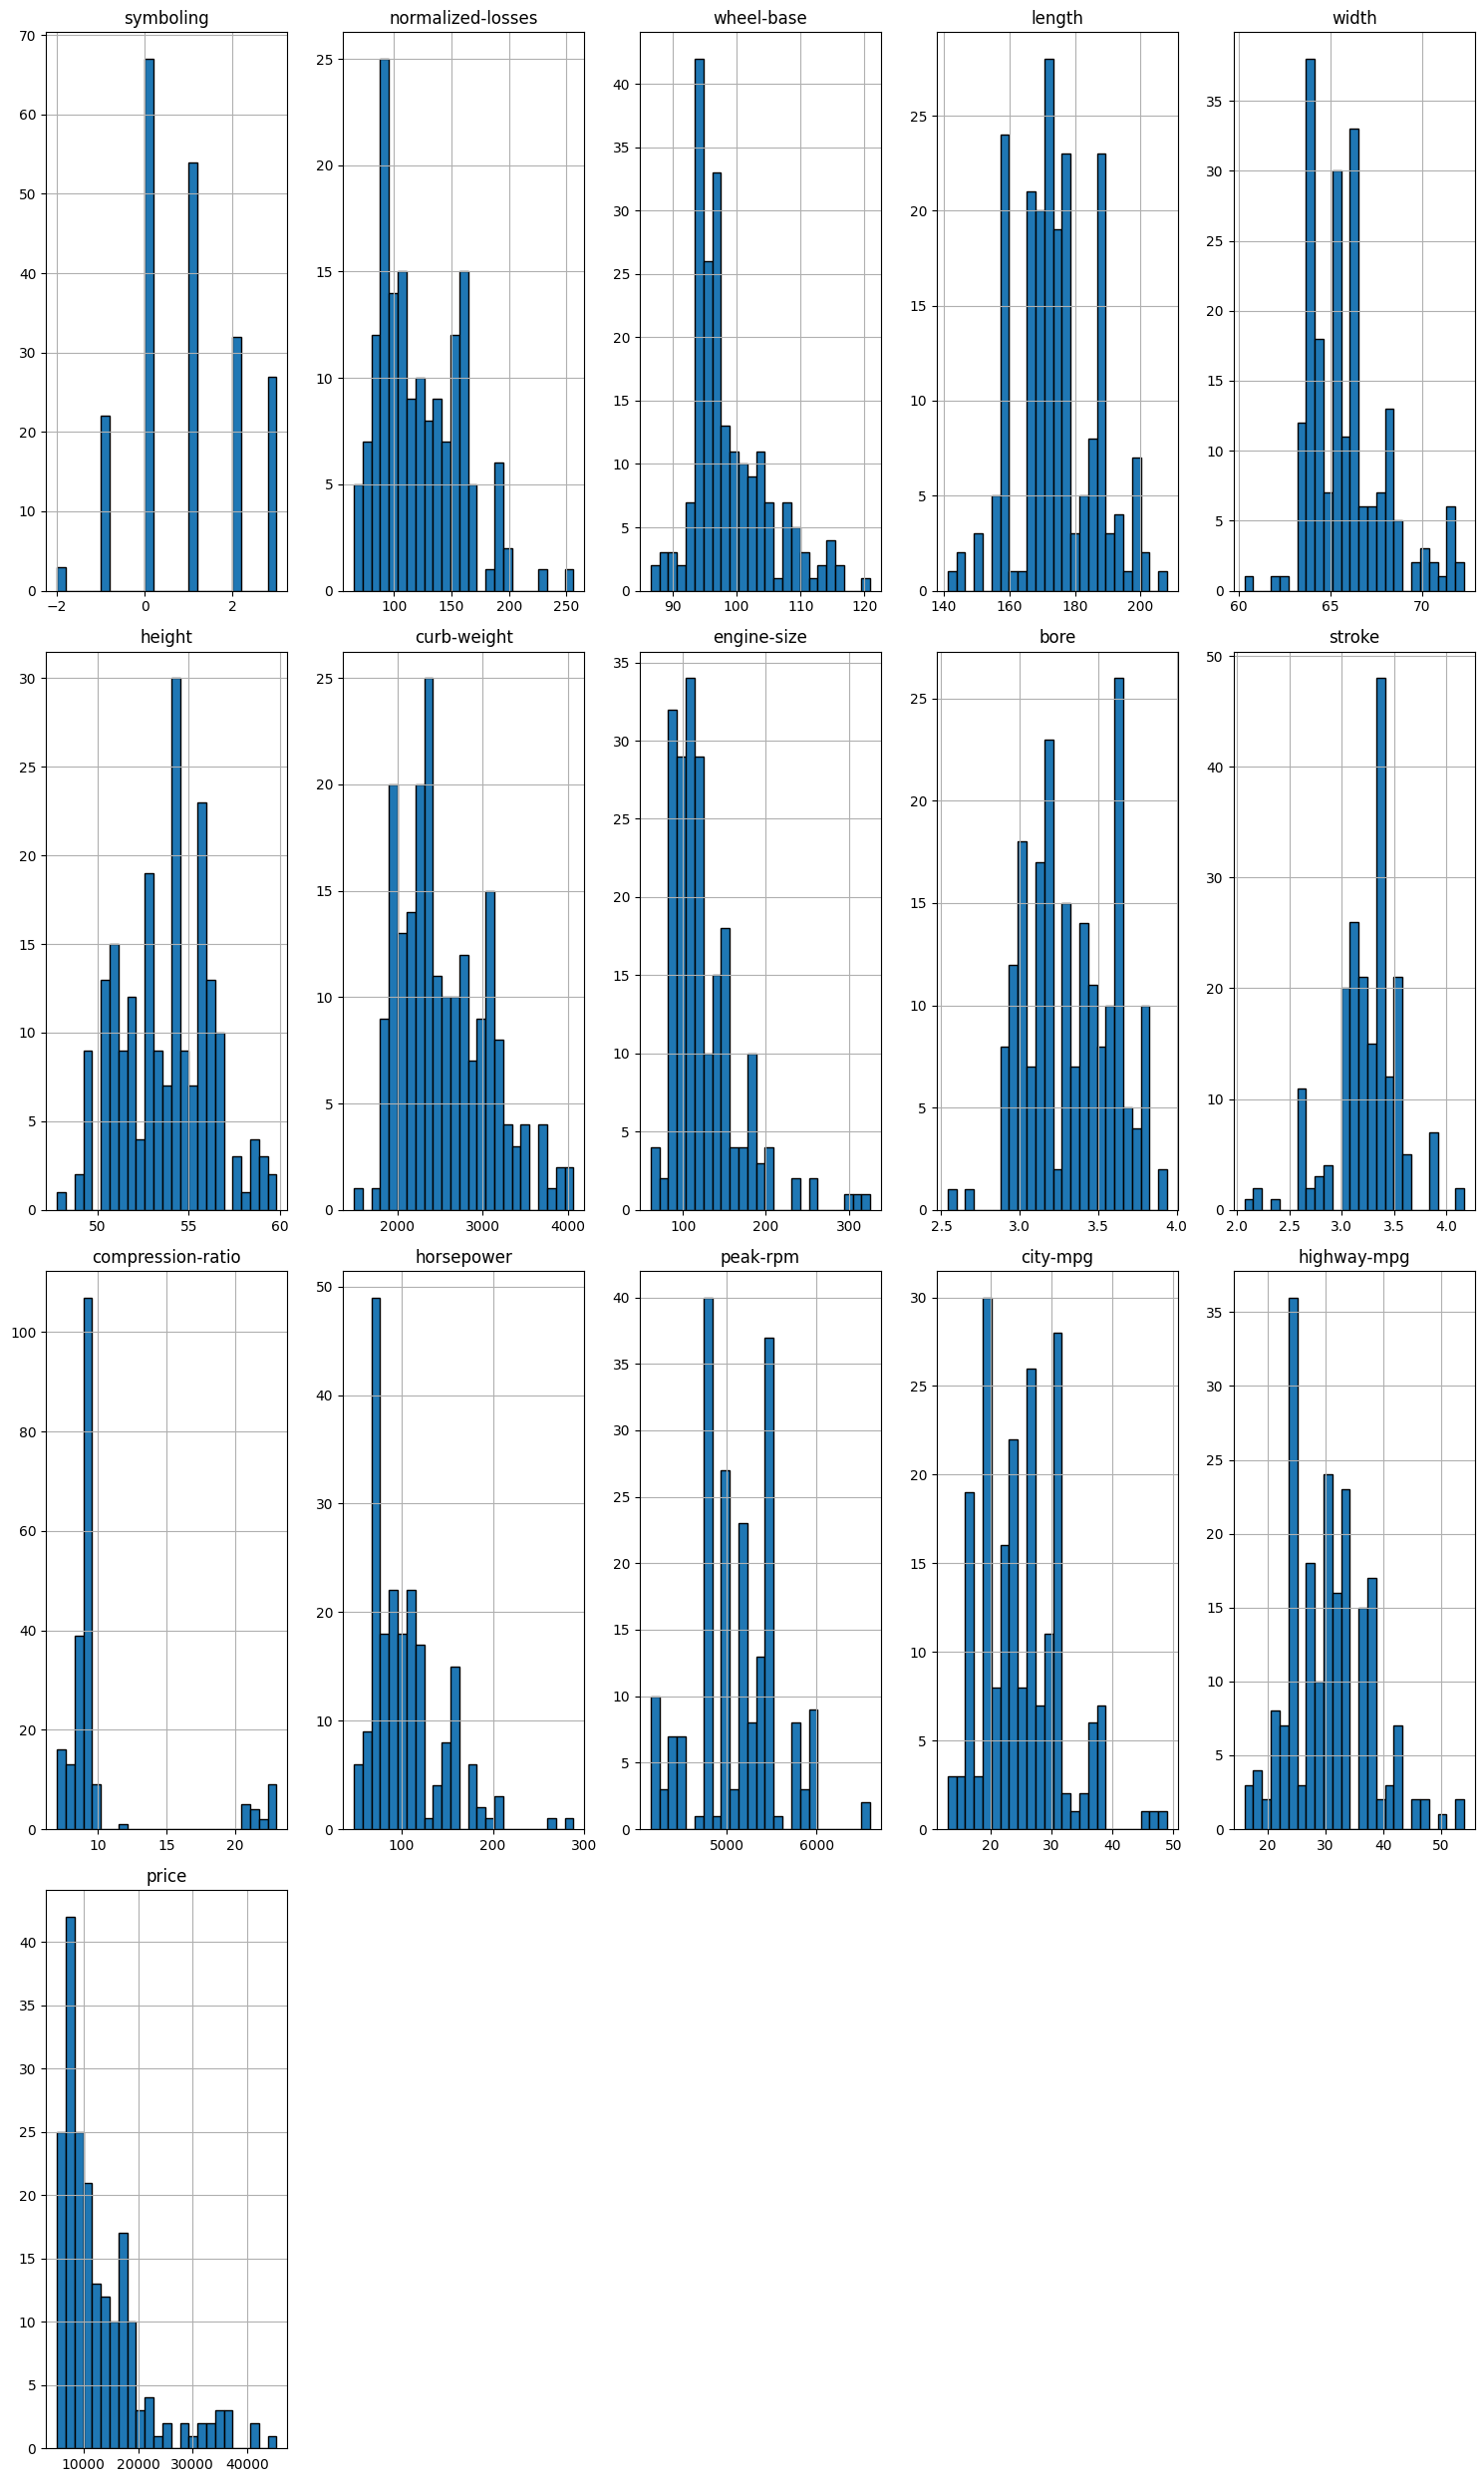

In [26]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

Looks like Horsepower has power-law distribution. 

engine-location     0.985366
fuel-type           0.902439
aspiration          0.819512
num-of-cylinders    0.775610
engine-type         0.721951
dtype: float64

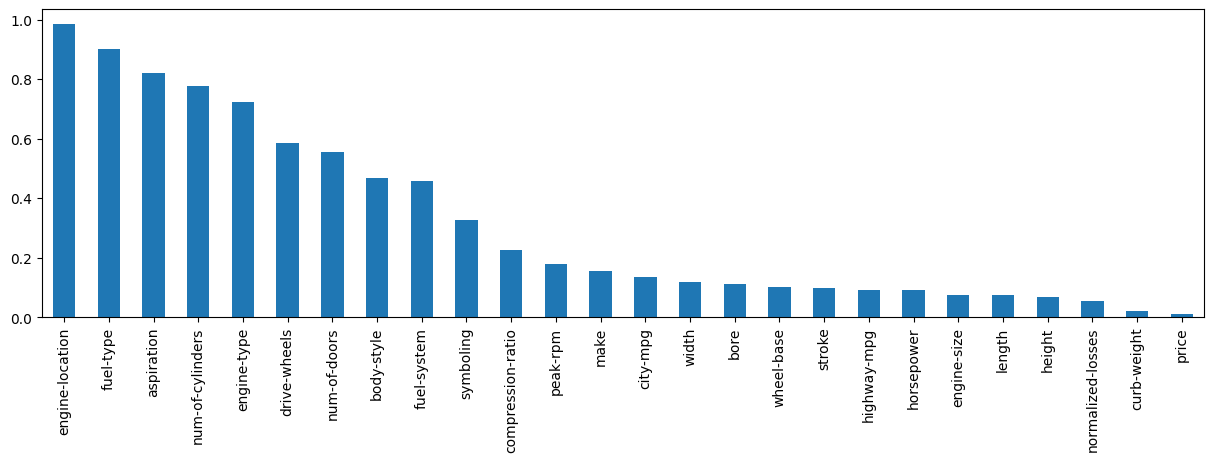

In [1727]:
# Most frequent values
most_frequent_entry = df.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df.eq(most_frequent_entry[:1][:].values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Top 5 features with the highest ratio of singular value content
display(df_freq.head())

df_freq.plot.bar(figsize=(15, 4));

##### 3.2. Feature patterns

Select all numeric features which have more than 24 unique values. 

In [29]:
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

##### 3.2.1. Continuous features

In [30]:
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

(205, 14)

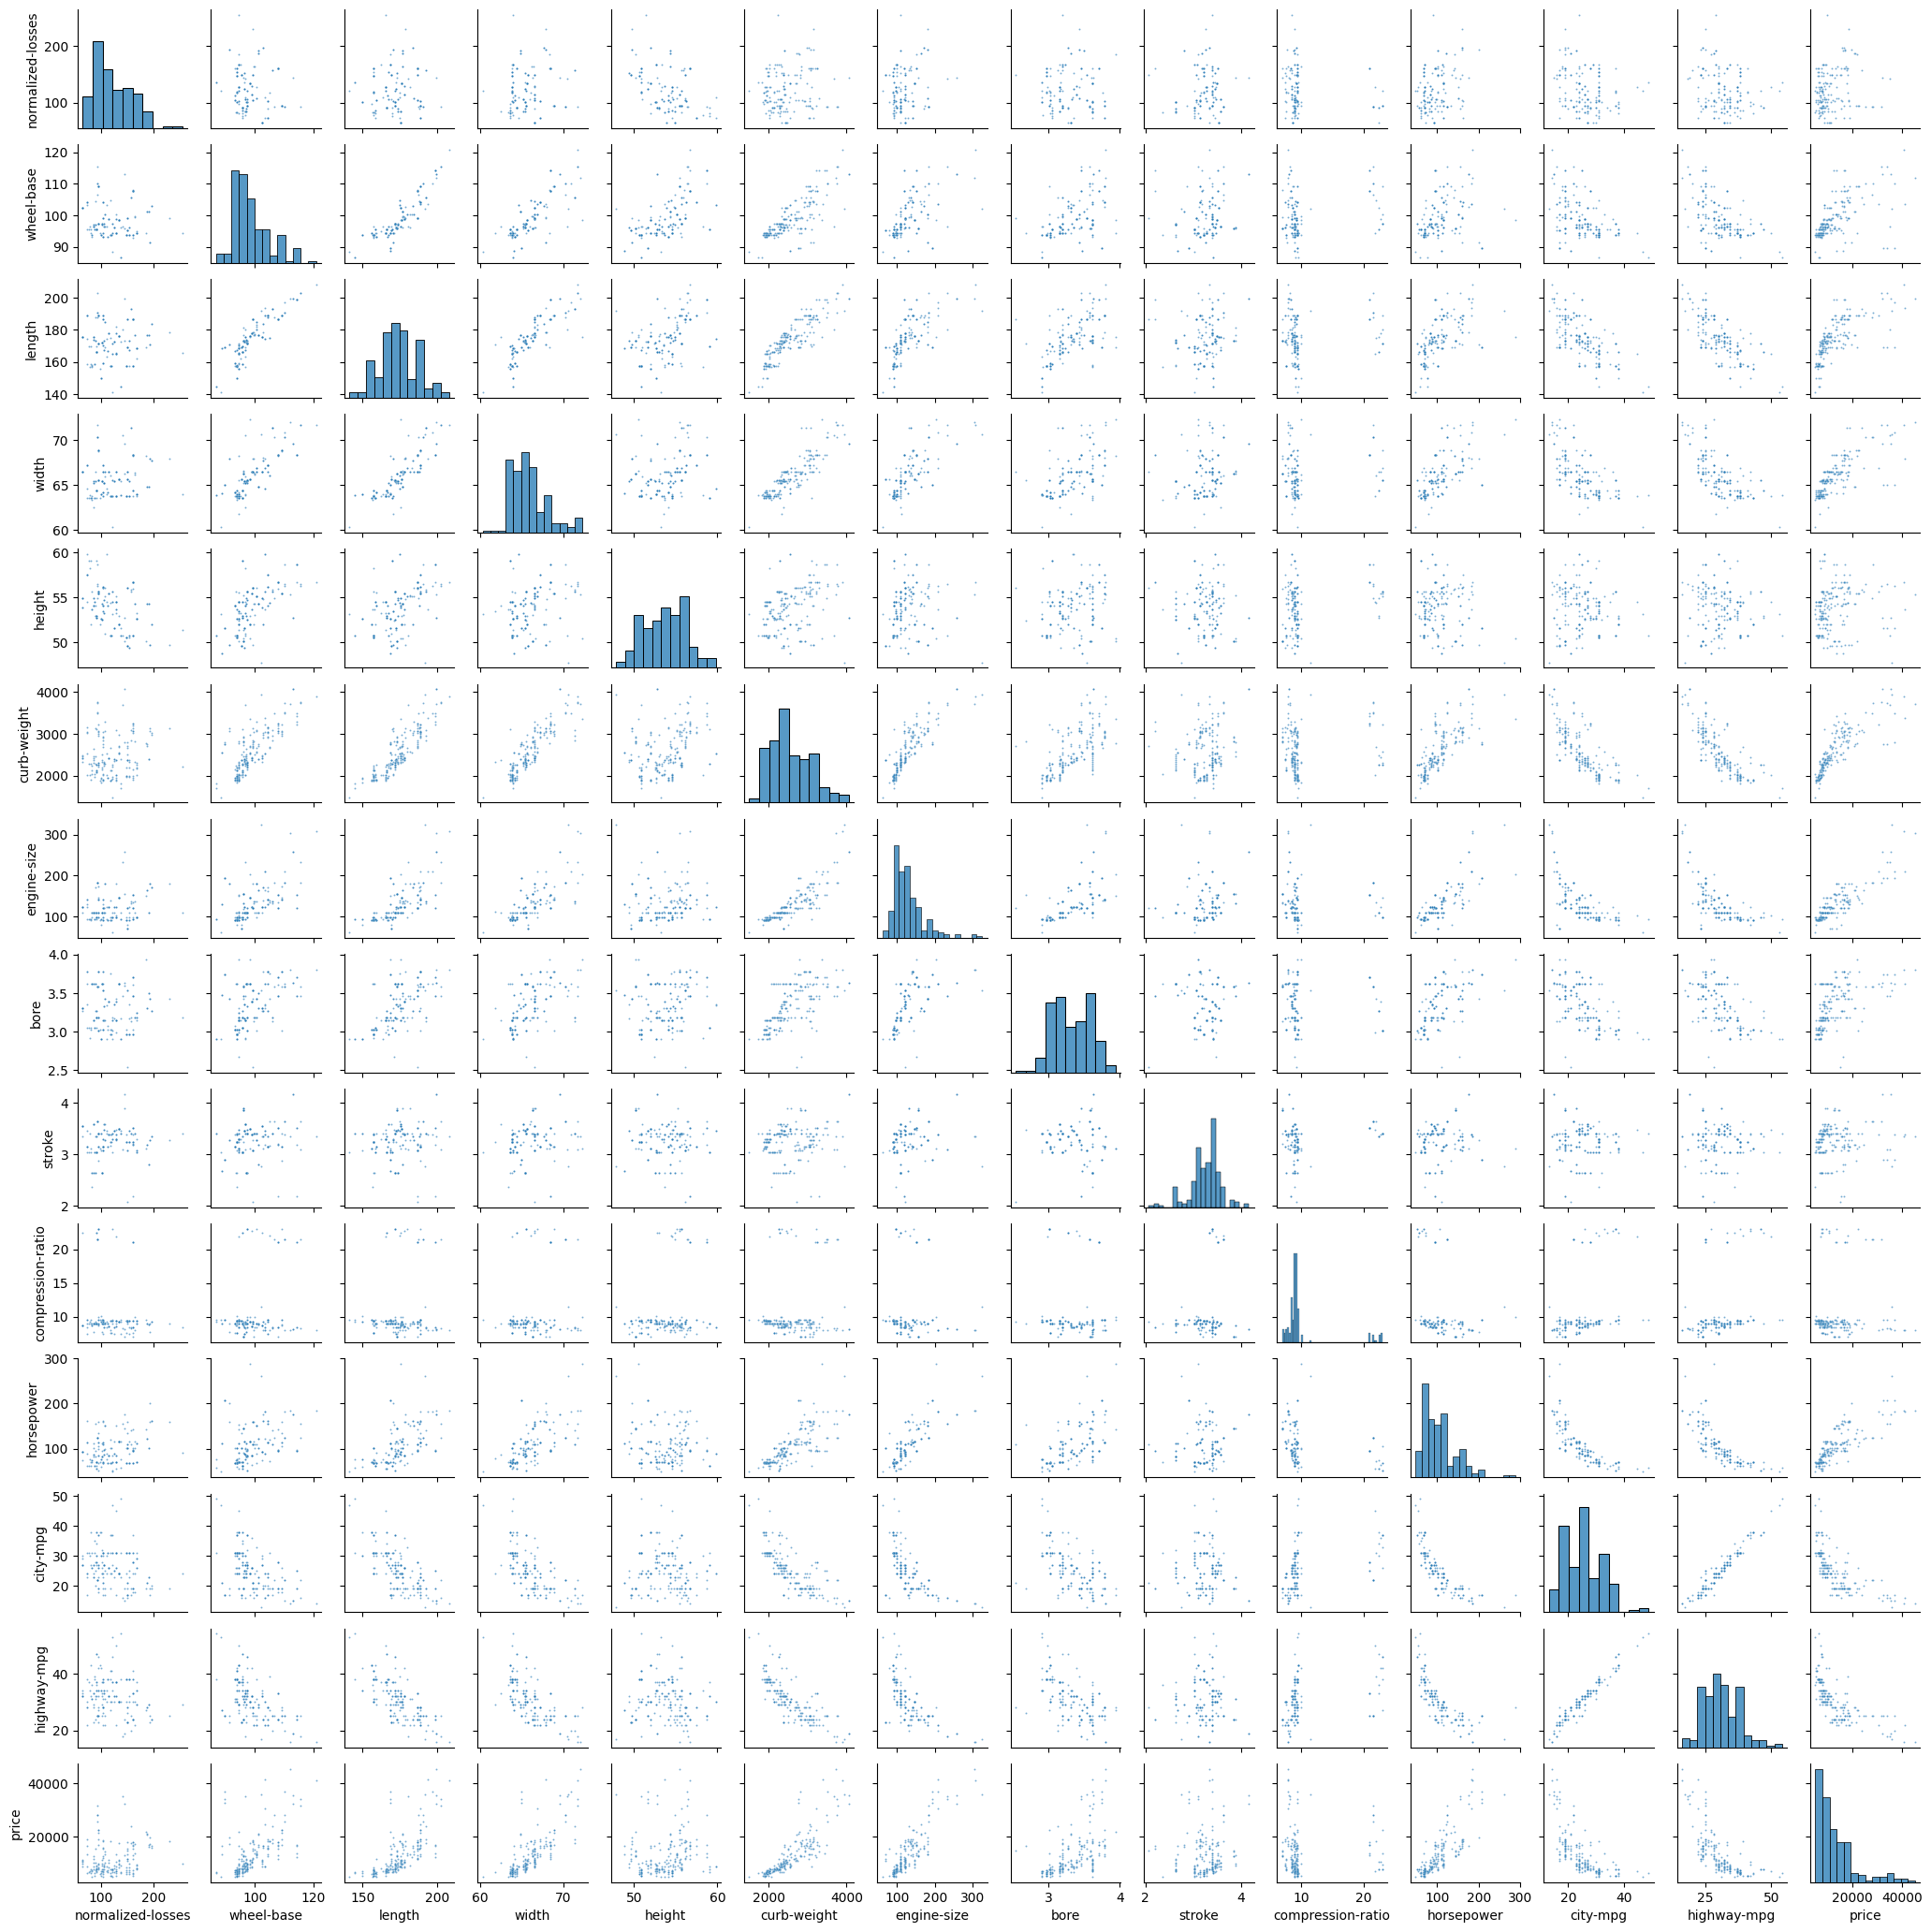

In [31]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.6})

In [1724]:
# Линейная зависимость длины и ширины, расстояния между осями колёс - геометрия машины. 
# Обратная зависимость мощности и пути на галлон топлива (mpg-city)
# mpg-city пр

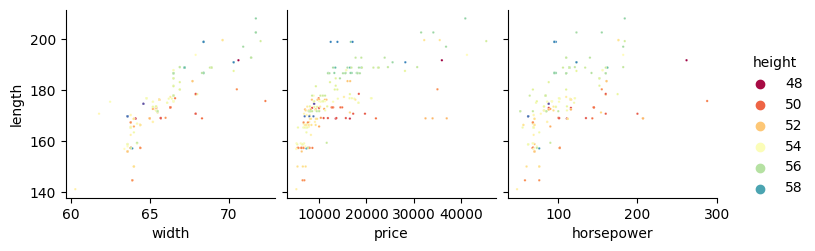

In [33]:
sns.pairplot(
    df, plot_kws={"s": 3, "alpha": 1}, hue="height", palette="Spectral",
    x_vars=["width", "price", "horsepower"],
    y_vars="length");

##### 3.2.2. Discrete and ordinal features

In [1751]:
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(205, 2)

There are 2 descrete variables: Symbolling and Peak-rpm 

C:\Users\Котик\AppData\Local\Temp\ipykernel_14844\3878144917.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10", size=2.5, alpha=1)
C:\Users\Котик\AppData\Local\Temp\ipykernel_14844\3878144917.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10", size=2.5, alpha=1)


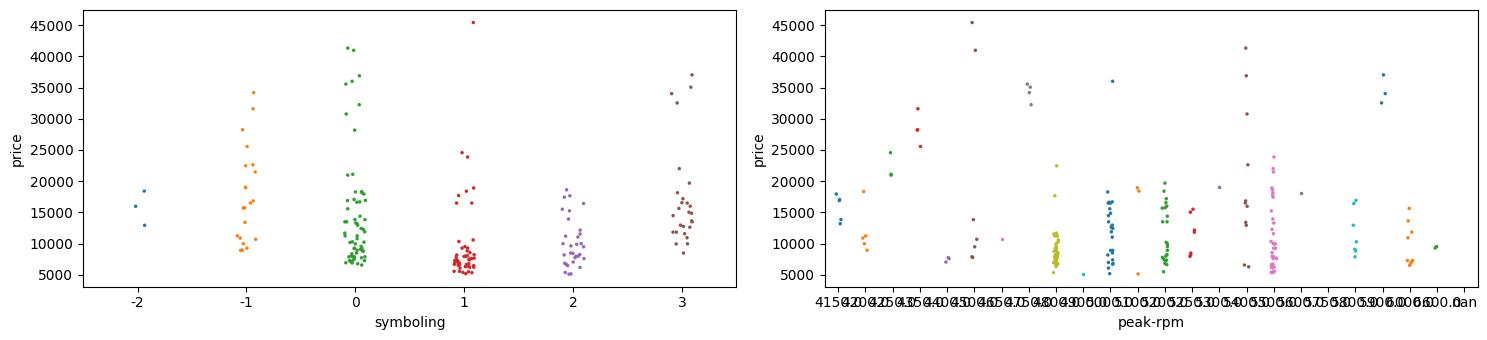

In [35]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 2
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df["price"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 3.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10", size=2.5, alpha=1)
plt.tight_layout();

<Axes: xlabel='symboling', ylabel='price'>

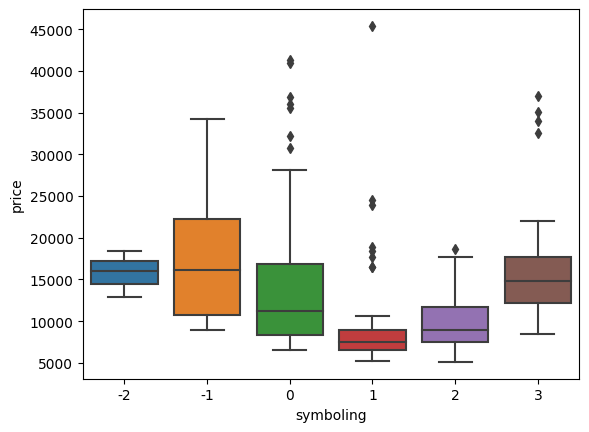

In [1722]:
sns.boxplot(data=df, x="symboling", y="price")

##### 3.3. Feature relationships

In [38]:
# Computes feature correlation
df_corr = df.corr(method="pearson")

<Axes: >

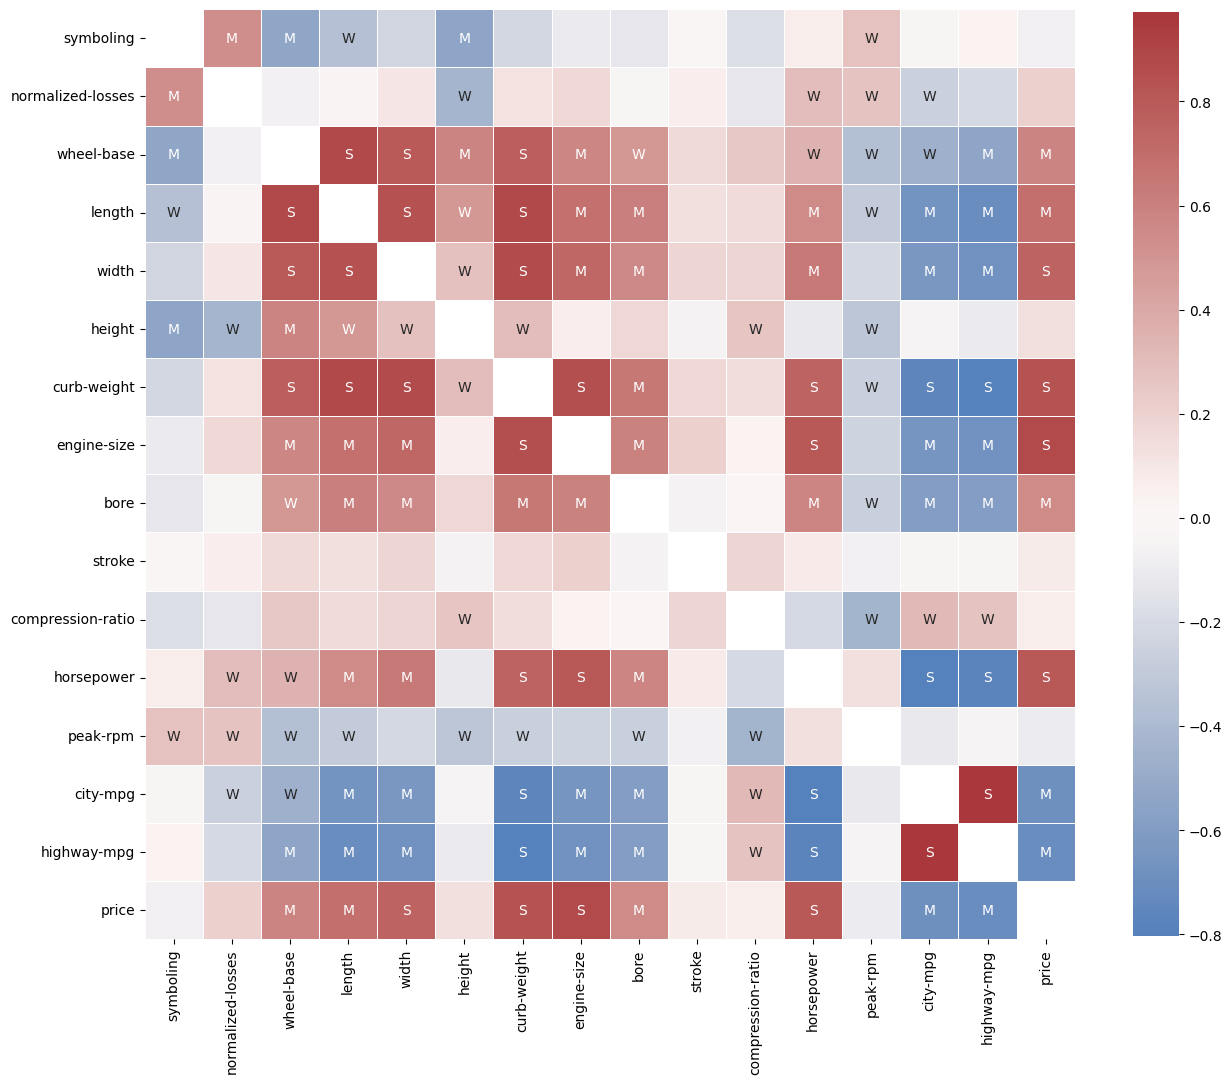

In [39]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

In [40]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

city-mpg     horsepower    -0.803620
highway-mpg  curb-weight   -0.797465
             horsepower    -0.770908
city-mpg     curb-weight   -0.757414
price        highway-mpg   -0.704692
                              ...   
curb-weight  width          0.867032
price        engine-size    0.872335
length       wheel-base     0.874587
curb-weight  length         0.877728
highway-mpg  city-mpg       0.971337
Length: 120, dtype: float64

### 4. Feature Selection

I will look through plots and try to find features to study next.

Plots:

<Axes: xlabel='curb-weight', ylabel='make'>

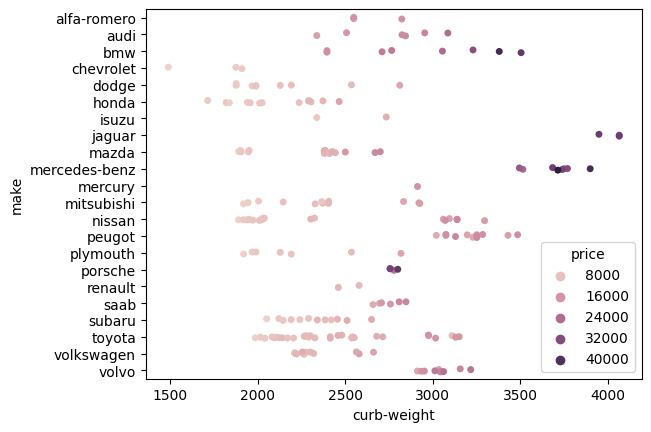

In [48]:
sns.stripplot(data=df, x="curb-weight", y="make", hue="price", legend=True)

Clearly there is relation between increesing weight and price.

Light cars are cheap 

<Axes: xlabel='curb-weight', ylabel='make'>

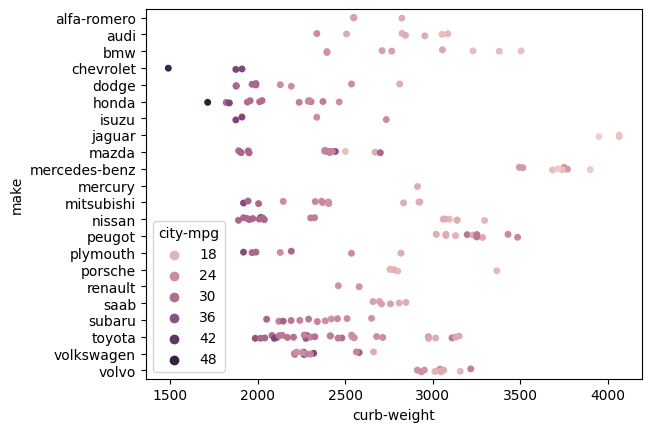

In [1534]:
sns.stripplot(data=df, x="curb-weight", y="make", hue="city-mpg", legend=True)

That's simple - heavier car need more gas.

MPG miles per gallon - more value - better 

<Axes: xlabel='curb-weight', ylabel='make'>

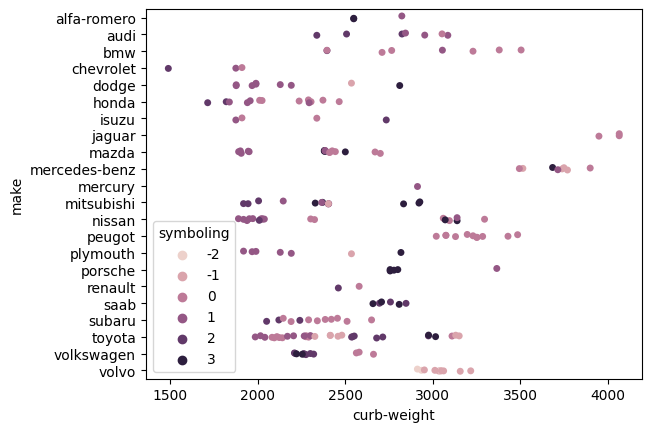

In [1535]:
sns.stripplot(data=df, x="curb-weight", y="make", hue="symboling", legend=True)

Light cars tend to be more insafe than heavier.

With exceptions by model-type and maker's policie (purpose, market segments, etc). 
Like Porsche and Volvo, Toyota (segments).


<Axes: xlabel='curb-weight', ylabel='make'>

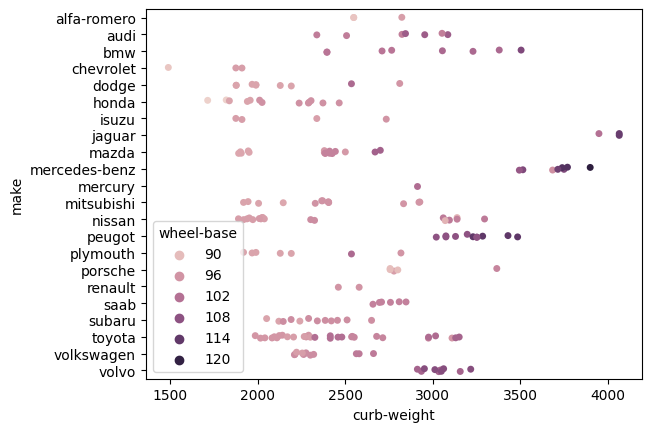

In [1547]:
sns.stripplot(data=df, x="curb-weight", y="make", hue="wheel-base", legend=True)

The smaller car is the less is distance between wheels axis. 

<Axes: xlabel='body-style', ylabel='make'>

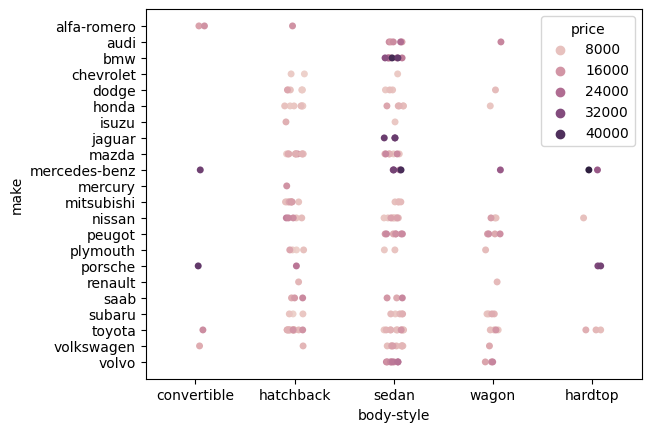

In [49]:
sns.stripplot(data=df, x="body-style", y="make", hue="price", legend=True)

It shows maker's price and marketing policie. (cheap - Plymouth, expensive - BMW, Merc, Jaguar)

<Axes: xlabel='engine-size', ylabel='horsepower'>

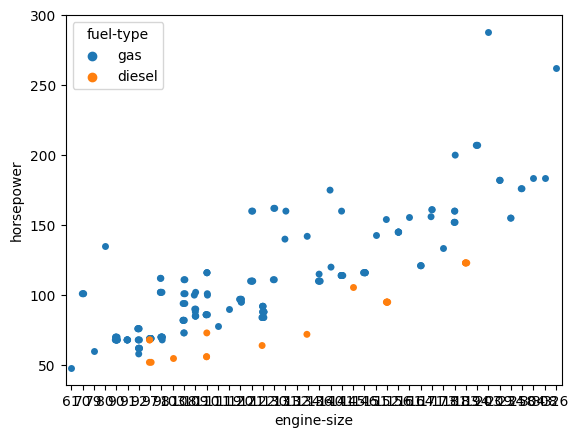

In [50]:
sns.stripplot(data=df, x="engine-size", y="horsepower", hue="fuel-type", legend=True)

Not enough data, but can guess that - same size engines working on diesel generate less power than gas once.

<Axes: xlabel='price', ylabel='horsepower'>

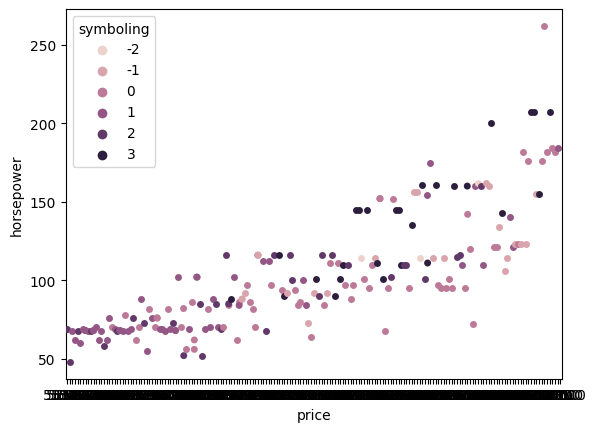

In [51]:
sns.stripplot(data=df, x="price", y="horsepower", hue="symboling", legend=True)

In the middle-high price range (verticle line) the less powerfull car is safer.

<Axes: xlabel='price', ylabel='symboling'>

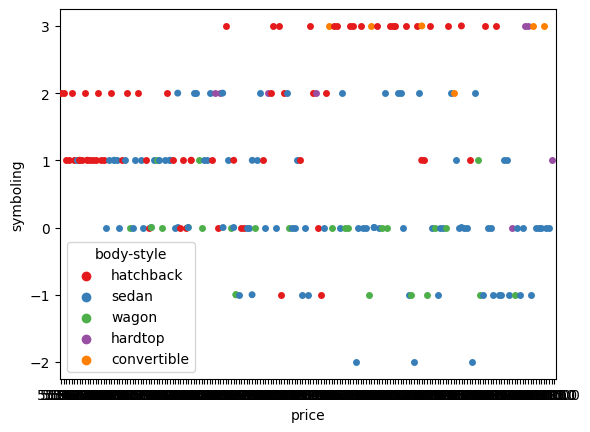

In [1757]:
sns.stripplot(data=df, x="price", y="symboling", hue="body-style", palette='Set1', legend=True)

Sedans with price higher than average are safest.

Cheap sedans are more dangerous

Hardtops and convertibles are the most dangerous 

Hatchbacks with higher-that-average price tend to be unsafe than below-the-average.

<Axes: xlabel='engine-size', ylabel='body-style'>

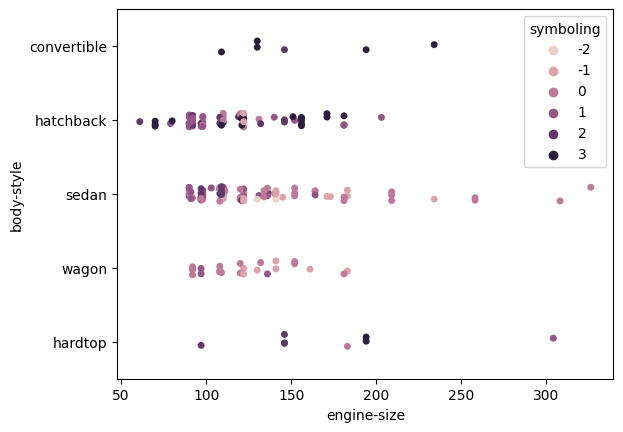

In [53]:
sns.stripplot(data=df, x="engine-size", y="body-style", hue="symboling", legend=True)

Sedans and wagons with bigger engine are safer than smaller.

Hatchbacks have somehow golden middle where are the safer zone is located. 

Converts and hardtops and most insafe.

<Axes: xlabel='symboling', ylabel='make'>

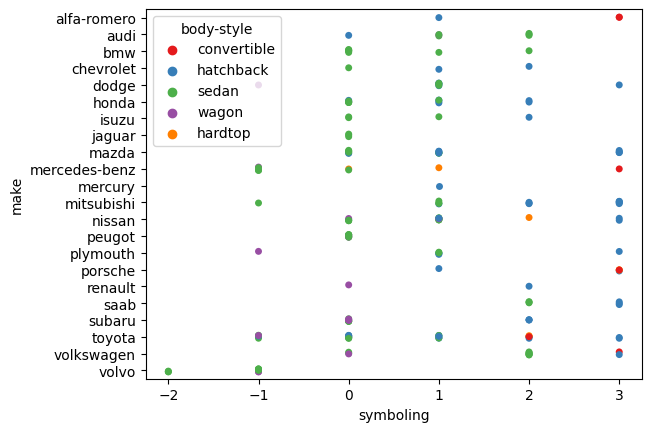

In [1753]:
sns.stripplot(data=df, x="symboling", y="make", hue="body-style", palette='Set1', legend=True)

Volvo makes safest cars.

<Axes: xlabel='body-style', ylabel='wheel-base'>

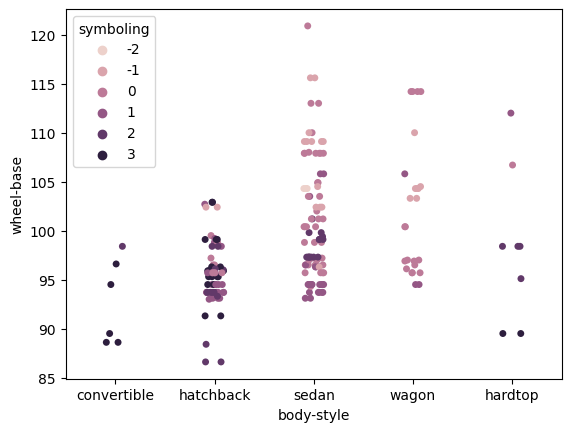

In [1553]:
sns.stripplot(data=df, x="body-style", y="wheel-base", hue="symboling", legend=True)

We can notice that cars with wheel-base less than 100 are significally more dangerous. 

<Axes: xlabel='highway-mpg', ylabel='engine-size'>

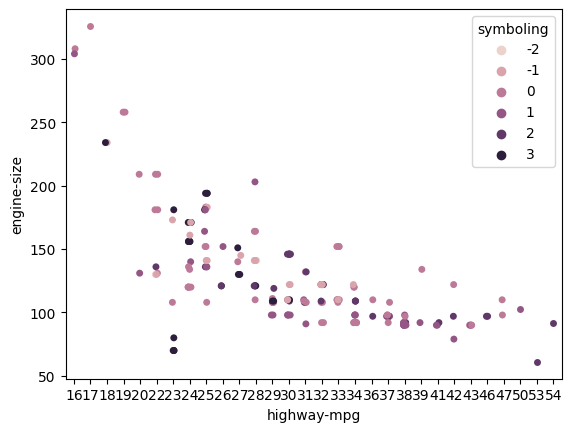

In [56]:
sns.stripplot(data=df, x="highway-mpg", y="engine-size", hue="symboling", legend=True)

Simple: The more engine-size the more gas it consumes

<Axes: xlabel='highway-mpg', ylabel='horsepower'>

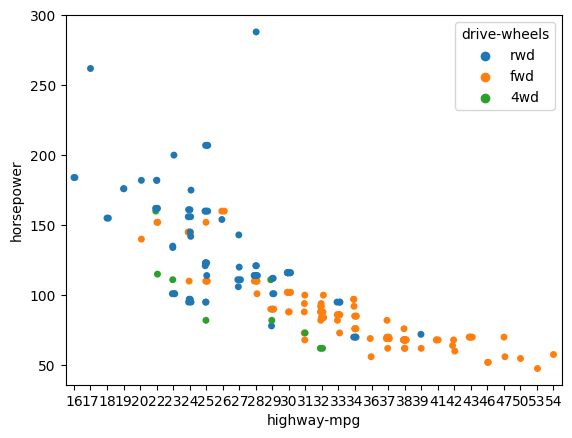

In [57]:
sns.stripplot(data=df, x="highway-mpg", y="horsepower", hue="drive-wheels", legend=True)

We can see that cars with forward driving wheels are more suiatable for city. 

In [1564]:
# sns.stripplot(data=df, x="normalized-losses", y="price", hue="body-style", palette='Set2', legend=True)

<Axes: xlabel='highway-mpg', ylabel='engine-type'>

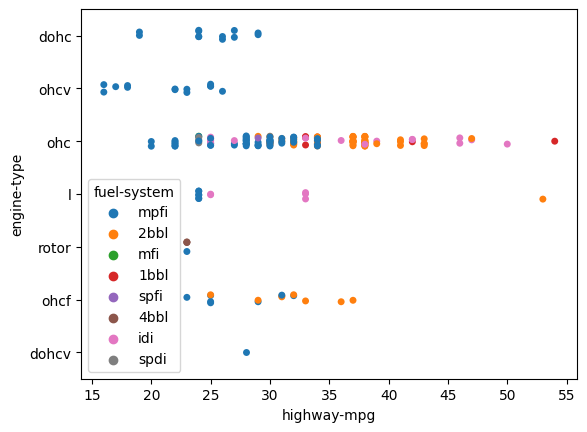

In [60]:
sns.stripplot(data=df, x="highway-mpg", y="engine-type", hue="fuel-system", legend=True)

Shows more ecological friendly engines 

### 5. Data Modelling 

Based on this plots and data distributions I will research:
    
    1) Relation between how far car can go on the city depending on it's horsepower.
    
    2) Try to predict insurance rate based on given data.

##### 5.1 Predicting Miles per Gallon

It's regression task and both variables (city-mpg, horsepower) are continious.

Horsepower is chosen because if study plots in Section 3.2.1
Data points at Horsepower-city-mpg graph are pretty fit. And form of graph is that we can fit a line in it, and is curvy so I can try something nonlinear.

Engine-size also correlates with city-mpg but data points are scattered wieder and at the same time Engine-size has good correlation with Horsepower so I see no sence to use it. 

First I apply linear regression algorithm.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df_mpg = df[['curb-weight', 'height', 'symboling', 'horsepower', 'city-mpg']].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_mpg.horsepower.values.reshape(-1, 1), df_mpg['city-mpg'].values, shuffle=True, test_size=0.3, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(df_mpg['curb-weight'].values.reshape(-1, 1), df_mpg['city-mpg'].values, test_size=0.3, random_state=1)
# With curb weight score r2 score is 0.54

reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
print('r2 score is:  ', reg.score(X_test, y_test))

r2 score is:   0.7023783867591962


In [22]:
# Since I believe Horsepower has power-law distribution I use Box-Cox Transformation.

from scipy import stats


xt, _ = stats.boxcox(df_mpg.horsepower.values)

X_train_, X_test_, y_train_, y_test_ = train_test_split(xt.reshape(-1, 1), df_mpg['city-mpg'].values, shuffle=True, test_size=0.3, random_state=1)

reg = LinearRegression(n_jobs=-1).fit(X_train_, y_train_)
print('r2 score is:  ', reg.score(X_test_, y_test_))

r2 score is:   0.8300761724029889


Now I try Support vector machines algorithm with radial kernel.

In [1737]:
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


regr = make_pipeline(StandardScaler(), SVR(C=1))
regr.fit(X_train, y_train)

regr_high_c = make_pipeline(StandardScaler(), SVR(C=30))
regr_high_c.fit(X_train, y_train)

print('C=1 r2 score is:  ', regr.score(X_test, y_test))
print('C=30 r2 score is:  ', regr_high_c.score(X_test, y_test))

C=1 r2 score is:   0.7376489313706664
C=30 r2 score is:   0.7956945820904158


In [1600]:
y_example_ = regr.predict(X_test)

Now I want to see how well Dense Neural Network will fit in. 

In [476]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, Sequential

Fow better scaling I choose to normalaize train_data (horsepower feature).

In [756]:
horsepower_ = np.array(X_train)

horsepower_normalizer_ = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer_.adapt(horsepower_)

In [1112]:
model = Sequential()

model.add(horsepower_normalizer_)


model.add(layers.Dense(units = 32))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units = 64, activation= tf.keras.layers.ReLU()))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units = 32, activation= tf.keras.layers.ReLU()))

model.add(layers.Dense(units = 1))

In [1113]:
model.summary()

Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_15 (Normaliz  (None, 1)                 3         
 ation)                                                          
                                                                 
 dense_330 (Dense)           (None, 32)                64        
                                                                 
 dropout_48 (Dropout)        (None, 32)                0         
                                                                 
 dense_331 (Dense)           (None, 64)                2112      
                                                                 
 dropout_49 (Dropout)        (None, 64)                0         
                                                                 
 dense_332 (Dense)           (None, 32)                2080      
                                                    

In [1114]:
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=0)

In [1749]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs =1000, verbose=0, validation_split=0.2, callbacks=[callback])

I add early stopping, to find moment where validation_loss will start to grow to avoid overfitting. 

In [1619]:
model.predict(X_test)[:5]

2/2 [==============================] - 0s 1000us/step


array([[25.376944],
       [25.376944],
       [37.85161 ],
       [27.208647],
       [21.675848]], dtype=float32)

In [1616]:
y_pred_neural = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [1617]:
y_predicted_nn = [value[0] for value in y_pred_neural]

In [1621]:
from sklearn.metrics import r2_score
print('Neural network r2 score is:  ', r2_score(y_test, y_predicted_nn))

Neural network r2 score is:   0.7943451473590729


In [1121]:
len(X_test)

61

Now I want to plot graph: 
1) For neural network only 
2) For all regression algorithms.

In [1741]:
x = tf.linspace(0, 250, 251)
y = model.predict(x)

8/8 [==============================] - 0s 4ms/step


In [1336]:
x_reshaped = np.array([i for i in range(0, 251)]).reshape(-1, 1)

In [1582]:
y_dnn = model.predict(x)
y_svr = regr.predict(x_reshaped)
y_svr_high_c = regr_high_c.predict(x_reshaped)
y_lin = reg.predict(x_reshaped)

8/8 [==============================] - 0s 1ms/step


In [1745]:
def plot_(x, y):
    plt.scatter(X_test, y_test, label='Data')
    plt.plot(x, y, color='k', label='Neural')
    plt.xlabel('Horsepower')
    plt.ylabel('City-mpg')
    plt.legend()

Separationg line for neural network looks like this:

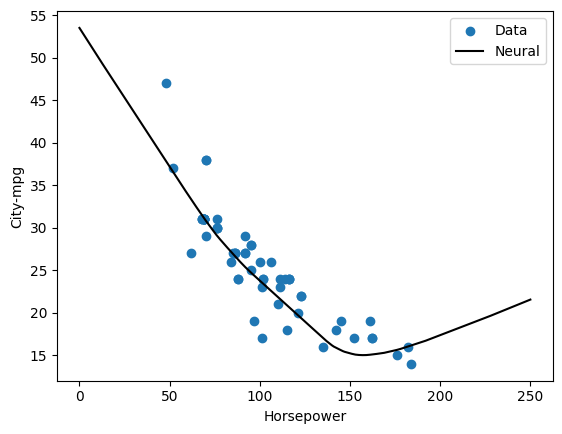

In [1746]:
plot_(x, y)

Now all: 

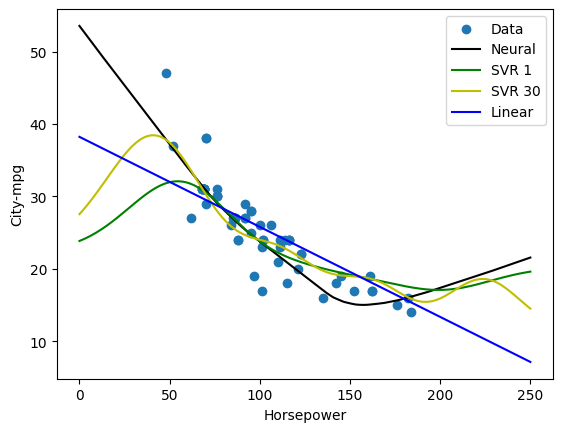

In [1585]:
plt.scatter(X_test, y_test, label='Data')
plt.plot(x, y, color='k', label='Neural')
plt.plot(x_reshaped, y_svr, color='g', label='SVR 1')
plt.plot(x_reshaped, y_svr_high_c, color='y', label='SVR 30')
plt.plot(x_reshaped, y_lin, color='b', label='Linear')
plt.xlabel('Horsepower')
plt.ylabel('City-mpg')
plt.legend()

If we look at the tails - we see that graphs start to increase y value again, while linear regression will become negative.

For non linear algorithms y increases beacause in train data there were some data points past X200 with high y value.

So it's seems a good idea to gather train set in way it would be gradually decreasing close to say 5 but never reaching it. 

##### 5.2 Insurance risks prediciton

##### 5.2.1 Numeric approach

This is a classification problem.

Since symboling feature has 6 values I can treat them as hierarhical classes. 

I choosed features based on heatmap at section 3.3

In [1644]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df_symbol = df[['normalized-losses', 'height', 'wheel-base', 'symboling']].dropna() # best atm

clf = RandomForestClassifier(max_depth=8, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(df_symbol.iloc[:, :-1].values, df_symbol.iloc[:, -1].values, test_size=0.3, stratify=df_symbol.iloc[:, -1].values, random_state=1)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9

In [1645]:
y_pred = clf.predict(X_test)

target_names = ['-2', '-1', '0', '1', '2', '3'] 

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       1.00      0.67      0.80         6
           0       0.88      1.00      0.94        15
           1       1.00      0.93      0.96        14
           2       0.82      1.00      0.90         9
           3       0.75      0.60      0.67         5

    accuracy                           0.90        50
   macro avg       0.91      0.87      0.88        50
weighted avg       0.91      0.90      0.90        50



In [1668]:
# from sklearn import tree


# tree.plot_tree(clf.estimators_[0], filled = True)

##### 5.2.2 Categorial selection: hierarchical

Now I want to check if I can use some categorial data to improve results.
Personally I don't see categorial features having order here. 

But will show both approaches looking for correlations on ordeal and not ordeal categorial variables. 

First I look for relations between target variable (symboling) and 9 other categorial variables encoded as ordeal: 

Feature 0: 55.948936
Feature 1: 1.135600
Feature 2: 10.817650
Feature 3: 37.647518
Feature 4: 12.600487
Feature 5: 4.156179
Feature 6: 6.473684
Feature 7: 1.239006
Feature 8: 8.019104
Feature 9: 31.101311


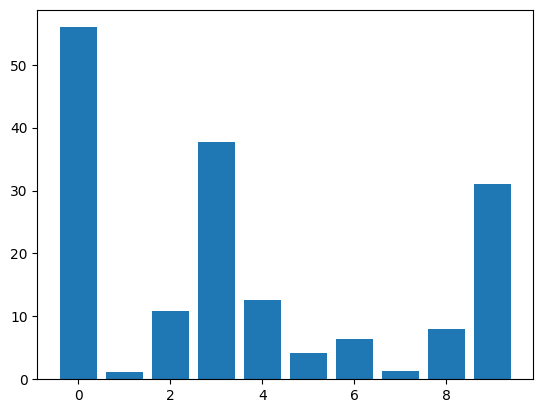

In [1733]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as pyplot

    
# encode features
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    # oe = OneHotEncoder()
    oe.fit(df_symbol_cat.iloc[:, :-1].values)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
    
# encode target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
    
# evaluate features with relation to target
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

obj_list = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
target = ['symboling']

df_symbol_cat =  df[obj_list + target].copy()
df_symbol_cat = df_symbol_cat.dropna()
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df_symbol_cat.iloc[:, :-1].values, df_symbol_cat.iloc[:, -1].values, stratify=df_symbol_cat.iloc[:, -1].values,  test_size=0.3, random_state=1)

X_train_enc, X_test_enc = prepare_inputs(X_train_cat, X_test_cat)

y_train_enc, y_test_enc = prepare_targets(y_train_cat, y_test_cat)

X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot scores:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Best 3 features are (from high to low): 'make', 'num-of-doors', 'num-of-cylinders'

##### 5.2.3 Categorial selection: non-hierarchical

Now I'll treat categorial as they have no order (which I believe is true).

First I'll transform categorial features with pd.get_dummies so they become all 0 and 1.

Than I want to find strong correlation betwean this binaries and continous numeric variables. 

So I choose to use Point Biserial correlation 

In [1671]:
import scipy.stats as stats


test_df = pd.get_dummies(df.copy())
test_df = test_df.dropna()
names = test_df.columns.tolist()

results = []

for name in names:
    iter_names = test_df.columns.tolist()
    iter_names.remove(name)
    for iter_name in iter_names:
        pointbiserial_result = stats.pointbiserialr(test_df[name].values, test_df[iter_name].values)
        if abs(pointbiserial_result[0]) > 0.75:
            # print(name, ' ', iter_name, ' ', pointbiserial_result)
            results.append(f'{name} {iter_name} {pointbiserial_result}')
            
results[:2]

C:\Users\Котик\PycharmProjects\jupyter\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


['wheel-base length PointbiserialrResult(correlation=0.8719680125137469, pvalue=7.084484113056364e-51)',
 'wheel-base width PointbiserialrResult(correlation=0.8159350123018112, pvalue=1.9523782231154225e-39)']

Results show that there are no strong enough correlations to add them to mu classifier. 

##### 5.2.4 Enriching model. 

So the best categorial variable so far is make.

Let's add new column to dataset.

In [1715]:
df_cat = pd.get_dummies(df)
df_symbol_cat = df_cat[['make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault', 'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo', 'normalized-losses', 'height', 'wheel-base', 'symboling']].dropna() # best atm

In [1713]:
from sklearn.ensemble import RandomForestClassifier
clf_enriched = RandomForestClassifier(max_depth=8, random_state=0)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df_symbol_cat.iloc[:, :-1].values, df_symbol_cat.iloc[:, -1].values, test_size=0.3, stratify=df_symbol_cat.iloc[:, -1].values, random_state=1)

clf_enriched.fit(X_train_cat, y_train_cat)

clf_enriched.score(X_test_cat, y_test_cat)

0.92

In [1683]:
clf_enriched_pred = clf_enriched.predict(X_test_cat)

In [1716]:
print(classification_report(clf_enriched_pred, y_test_cat, target_names=target_names))

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.83      1.00      0.91         5
           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.96        13
           2       1.00      0.82      0.90        11
           3       0.60      0.75      0.67         4

    accuracy                           0.92        50
   macro avg       0.89      0.92      0.90        50
weighted avg       0.93      0.92      0.92        50



Hooray! Adding new variable helped to increase score by +2% 

In [1750]:
# Анализ данных
# Кейс компании DOC+
# Мы предлагаем вам пройти тестовое задание на знание методов обработки данных. Задание
# никак не связано непосредственно с медициной и необходимо для демонстрации ваших знаний
# и умении применять их на практике.
# Задание основано на открытом датасете https://archive.ics.uci.edu/ml/datasets/automobile ,
# содержащем информацию о параметрах различных автомобилей (подробное описание датасета
# по ссылке).
# Датасет содержит всего 205 строк, очевидно этого недостаточно для создания полноценной
# стабильной модели. Цель данного кейса не решить конкретную задачу, добившись
# максимальной точности, а продемонстрировать ход ваших мыслей и владение инструментами
# и методами анализа данных. Задание рассчитано на 3-4 часа.
# Пожалуйста, проанализируйте представленные данные (dataset.csv) и ответьте на несколько
# вопросов:
# 1. Придумайте и опишите наибольшее число вариантов использования этих данных. Для
# решения каких практических задач их можно применить?
# 2. Выберите одну из описанных вами задач и реализуйте ее решение на Python / R при
# помощи оптимальной на ваш взгляд модели. Опишите, почему вы выбрали именно эту
# модель.
# 3. Опишите ваш подход к предварительному анализу (в т.ч. визуализации) и обработке
# данных, работе с признаками, кросс валидацией, настройкой модели и ее оценкой.
# Объясните выбор того или иного решения и, по возможности, сравните с
# альтернативами.
# 4. Опишите, как бы вы улучшили модель из пункта 2, если бы у вас было больше времени
# и существенно больший датасет.
# Желаем успеха!

Что можно доделать: 

1) Посмотреть подробнее пропущенные значения в данных и вместо того чтобы выбрасывать их пробовать разные варианты заполнения. 

2) Для задачи регрессии использовать все фичи, оценить их влияние/feature_importance и провести новый feature_selection.

3) Подробнее рассмотреть распределения переменных. 

4) Рассмотреть подробнее большее количество категориальных переменных. 

5) Выбрать перспективную фичу и отработать на ней алгоритмы кластеризации. 

6) Взять новые (современные) данные по авто и провести качественный анализ, насколько изменился автопром за 40 лет.